## Clone repo and install requirements

In [1]:
!git clone -b collab  https://github.com/SubstraFoundation/distributed-learning-contributivity

Cloning into 'distributed-learning-contributivity'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 2707 (delta 117), reused 109 (delta 49), pack-reused 2514
Receiving objects: 100% (2707/2707), 5.36 MiB | 27.32 MiB/s, done.
Resolving deltas: 100% (1788/1788), done.


In [2]:
%cd distributed-learning-contributivity/
!ls 

/content/distributed-learning-contributivity
config_quick_debug.yml	img			   requirements.txt
config.yml		LICENSE			   run_experiment.ipynb
constants.py		main.py			   saved_experiments
CONTRIBUTING.md		multi_partner_learning.py  scenario.py
contributivity.py	notebooks		   shapley_value
dataset.py		partner.py		   utils.py
datasets		README.md


In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 13.1MB 237kB/s 
     |████████████████████████████████| 20.2MB 74.5MB/s 
     |████████████████████████████████| 7.1MB 49.9MB/s 
     |████████████████████████████████| 10.4MB 51.8MB/s 
     |████████████████████████████████| 225kB 54.3MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 421.8MB 26kB/s 
     |████████████████████████████████| 112kB 54.2MB/s 
     |████████████████████████████████| 450kB 55.3MB/s 
     |████████████████████████████████| 3.9MB 47.8MB/s 
     |████████████████████████████████| 552kB 50.3MB/s 
     |████████████████████████████████| 102kB 13.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=66710344ba899e9558b89df307a9890b498cf5382d7280e698ff296d854eba25
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.wh

## Specify config file and launch computations

In [4]:
document = """
experiment_name: debug_config
n_repeats: 1
scenario_params_list:
 - dataset_name:
    - 'mnist'
   partners_count:
    - 3
   amounts_per_partner: 
    - [0.2, 0.5, 0.3]
   samples_split_option: 
    - 'random'
   multi_partner_learning_approach:
    - 'fedavg'
   aggregation_weighting:
    - 'uniform'
   gradient_updates_per_pass_count:
    - 5
"""

In [5]:
f = open("config.yml", "w")
f.write(document)
f.close()

!cat config.yml


experiment_name: debug_config
n_repeats: 1
scenario_params_list:
 - dataset_name:
    - 'mnist'
   partners_count:
    - 3
   amounts_per_partner: 
    - [0.2, 0.5, 0.3]
   samples_split_option: 
    - 'random'
   multi_partner_learning_approach:
    - 'fedavg'
   aggregation_weighting:
    - 'uniform'
   gradient_updates_per_pass_count:
    - 5


In [6]:
!python main.py

2020-06-17 11:20:06.244503: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-06-17 11:20:06.244642: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-06-17 11:20:06.244661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Using TensorFlow backend.
170500096/170498071 [==============================] - 2s 0us/step
2020-06-17 11:20:12.944 | INFO     | __main__:get_config_from_file:200 - Using default config file: config.yml
2020-

# Analyse results

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
root_folder = Path("experiments")

# Get latest generated folder
subfolder_list = [f for f in root_folder.iterdir()]
subfolder_list_creation_time = [f.stat().st_ctime for f in subfolder_list]
latest_subfolder_idx =  subfolder_list_creation_time.index(max(subfolder_list_creation_time))
experiment_path = subfolder_list[latest_subfolder_idx]

# Read CSV results
df = pd.read_csv(experiment_path / "results.csv")
print(experiment_path)

experiments/debug_config_2020-06-17_11h20


In [8]:
# Config file
with open(experiment_path / "config.yml") as f:
     print(f.read())


experiment_name: debug_config
n_repeats: 1
scenario_params_list:
 - dataset_name:
    - 'mnist'
   partners_count:
    - 3
   amounts_per_partner: 
    - [0.2, 0.5, 0.3]
   samples_split_option: 
    - 'random'
   multi_partner_learning_approach:
    - 'fedavg'
   aggregation_weighting:
    - 'uniform'
   gradient_updates_per_pass_count:
    - 5



In [9]:
experiment_path
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   aggregation_weighting            1 non-null      object 
 1   amounts_per_partner              1 non-null      object 
 2   dataset_name                     1 non-null      object 
 3   epoch_count                      1 non-null      float64
 4   final_relative_nb_samples        1 non-null      object 
 5   gradient_updates_per_pass_count  1 non-null      float64
 6   is_early_stopping                1 non-null      float64
 7   learning_computation_time_sec    1 non-null      float64
 8   minibatch_count                  1 non-null      float64
 9   mpl_nb_epochs_done               1 non-null      float64
 10  mpl_test_score                   1 non-null      float64
 11  multi_partner_learning_approach  1 non-null      object 
 12  nb_samples_used           

In [10]:
scenario_ids = df.scenario_id.unique()
random_states = df.random_state.unique()
samples_split_option_list = df.samples_split_option.unique()
amounts_per_partner_list = df.amounts_per_partner.unique()
gradient_updates_per_pass_count_list = df.gradient_updates_per_pass_count.unique()
dataset_name_list = df.dataset_name.unique()

print('Random state', random_states)
print('Scenario id', scenario_ids)
print('amounts_per_partner', amounts_per_partner_list)
print()

df.info()


Random state [0]
Scenario id [0]
amounts_per_partner ['[0.2, 0.5, 0.3]']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   aggregation_weighting            1 non-null      object 
 1   amounts_per_partner              1 non-null      object 
 2   dataset_name                     1 non-null      object 
 3   epoch_count                      1 non-null      float64
 4   final_relative_nb_samples        1 non-null      object 
 5   gradient_updates_per_pass_count  1 non-null      float64
 6   is_early_stopping                1 non-null      float64
 7   learning_computation_time_sec    1 non-null      float64
 8   minibatch_count                  1 non-null      float64
 9   mpl_nb_epochs_done               1 non-null      float64
 10  mpl_test_score                   1 non-null      float64
 11  multi_partner_

In [11]:
df["computation_time_minutes"] = df.learning_computation_time_sec / 60
df.short_scenario_name = df.samples_split_option + df.amounts_per_partner + ' mb ' + df.minibatch_count.astype(str)
df.short_scenario_name.unique()
#df.contributivity_method = df.contributivity_method.str.replace('values', '')

array(['random[0.2, 0.5, 0.3] mb 20.0'], dtype=object)

In [12]:
# Helper function for plot
def get_x_tick_amount(df, scenario_id, partners_ids):
    
    x_ticks = []
    for partner_id in partners_ids:
        current_df = df[(df.scenario_id == scenario_id) & (df.partner_id == partner_id)]
        amount = current_df.amount_per_partner.unique()

        assert(len(amount) == 1)
        amount = amount[0]
    
        x_ticks.append('partner_' + str(partner_id) + ' ' + str(amount))
    return x_ticks

################################################
mnist


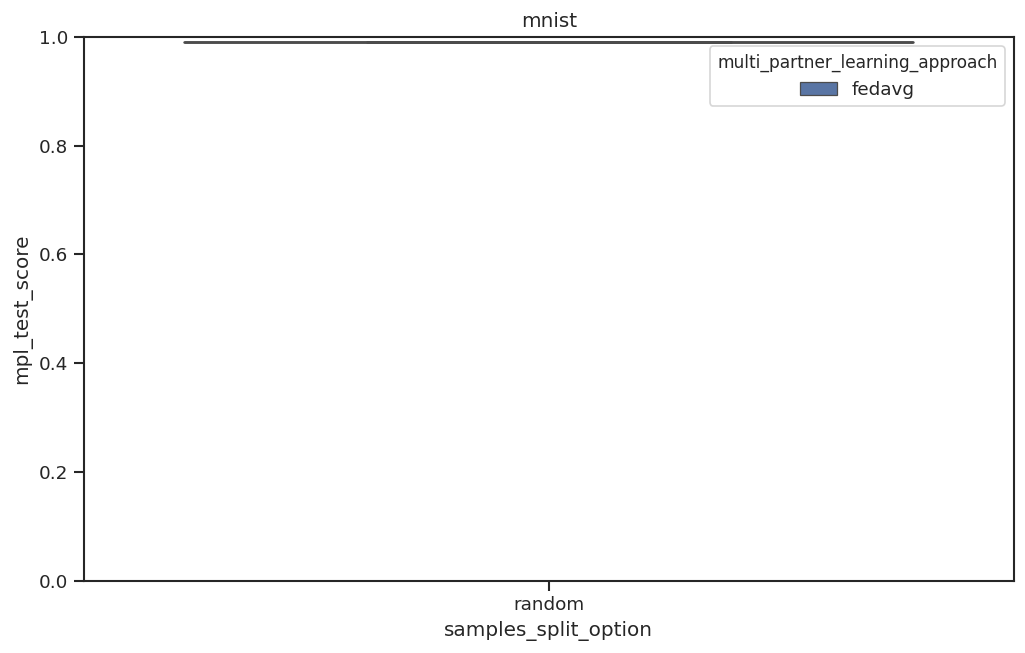

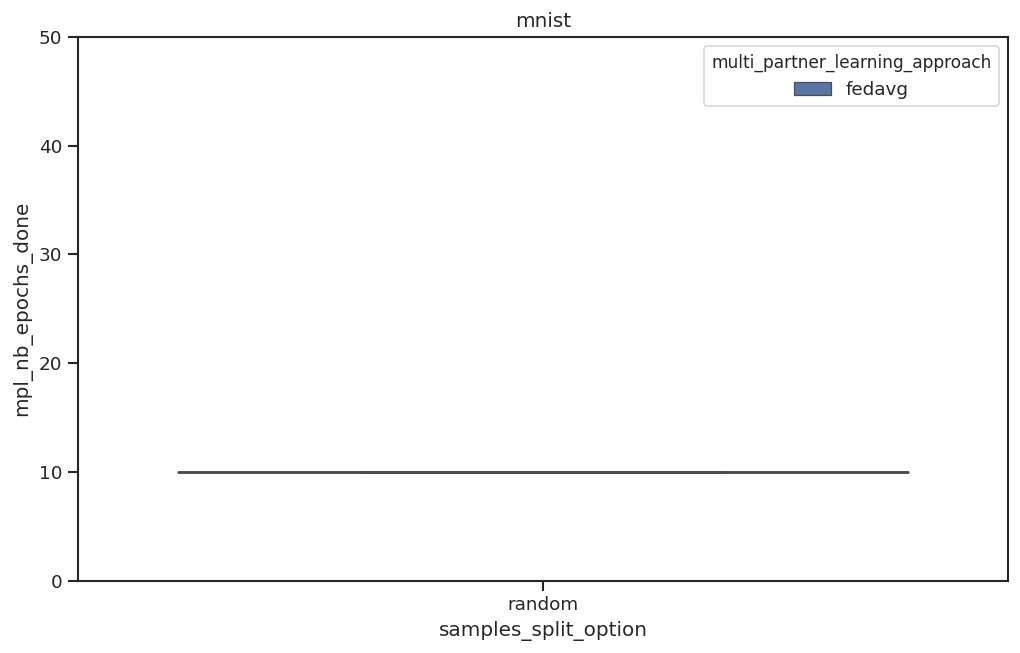

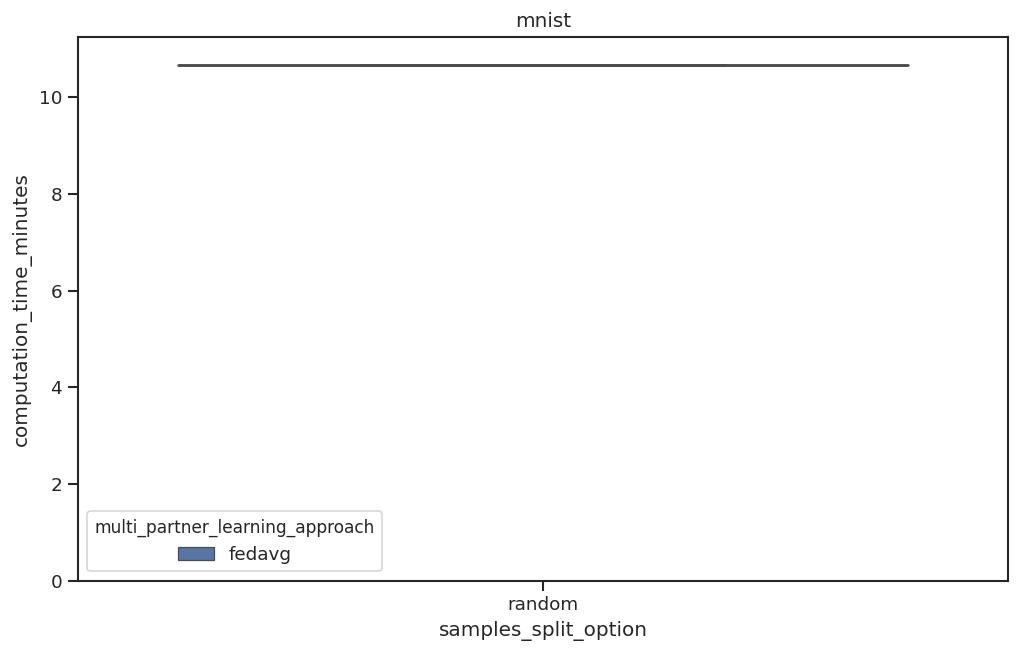

In [13]:
# Plot loop


for dataset_name in dataset_name_list:

    current_df = df[(df.dataset_name == dataset_name)]
    title = dataset_name
    sns.set(style="ticks")
    #current_df.info()
    print("################################################")
    print(dataset_name)

    plt.figure(figsize=(10, 6), dpi=120)
    plt.title(title)
    ax = sns.boxplot(x="samples_split_option", y="mpl_test_score", hue="multi_partner_learning_approach",
                       data=current_df)# medianprops={'color':'yellow'})
    plt.ylim([0, 1])

    plt.figure(figsize=(10, 6), dpi=120)
    plt.title(title)
    ax = sns.boxplot(x="samples_split_option", y="mpl_nb_epochs_done", hue="multi_partner_learning_approach",
                       data=current_df)
    plt.ylim([0, 50])


    ax = plt.figure(figsize=(10, 6), dpi=120)
    plt.title(title)
    sns.boxplot(x="samples_split_option", y="computation_time_minutes", hue="multi_partner_learning_approach",
                      data=current_df)
    plt.ylim(bottom=0)


    plt.show()
